# Medindo a adaptabilidade dos alunos à educação online

---

# 1. Problema de Negócio

A pandemia trouxe diversas mudanças no nosso dia-a-dia, e a mais impactante (além do problema sanitário) foi a transferência do ensino presencial para o ensino à distância, que impactou diretamente a vida de milhões de estudantes ao redor do mundo. Neste projeto, utilizaremos modelos de classificação para saber qual o grau de adaptabilidade dos estudantes e o que pode ter influenciado essa medida.

# 2. Modelo

O modelo utilizado neste relatório é o K-Nearest Neighbors(KNN), um algoritmo de aprendizagem supervisionada que busca mostrar a similaridade entre vetores(ou dados) por meio da medição da distância entre eles. Quanto mais próximos os 'pontos', mais semelhantes são os dados. O algoritmo KNN utiliza de várias métricas que medem distância entre pontos, como por exemplo, a distância euclidiana, que usa o Teorema de Pitágoras. Com isso, o programador escolhe quantos pontos(ou vizinhos) próximos ele quer considerar no modelo. A imagem a seguir ilustra isso:

<img src="https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png.webp" width="35%" />

# 3. Preparação dos Dados

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,fbeta_score, precision_score, recall_score

from sklearn import metrics, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Tratamento dos dados

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.pop('Class Duration')
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,No,Mobile,Low


- Removemos a coluna "Class Duration" porque a métrica utilizada nessa coluna é incerta

---

In [3]:
df.isna().any()

Gender                 False
Age                    False
Education Level        False
Institution Type       False
IT Student             False
Location               False
Load-shedding          False
Financial Condition    False
Internet Type          False
Network Type           False
Self Lms               False
Device                 False
Adaptivity Level       False
dtype: bool

- O dataset não possui valores *NaN*

---

In [4]:
le = LabelEncoder()
df_fact = df.apply(le.fit_transform)
df_fact.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,2
2,1,2,0,0,0,1,1,0,1,2,0,1,2
3,1,1,1,1,0,1,1,0,0,2,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,1,1


In [5]:
df_fact.dtypes

Gender                 int32
Age                    int32
Education Level        int32
Institution Type       int32
IT Student             int32
Location               int32
Load-shedding          int32
Financial Condition    int32
Internet Type          int32
Network Type           int32
Self Lms               int32
Device                 int32
Adaptivity Level       int32
dtype: object

- Aqui estamos 'rotulando' o dataset. O modelo KNN não consegue trabalhar com strings(palavras), portanto precisamos transformá-las em números para se tornarem 'legíveis' para a máquina.

---

In [6]:
# Normalizando todos os valores de 'df_fact', exceto a coluna 'Adaptivity Level', que é o Target
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_fact.loc[:, df_fact.columns != "Adaptivity Level"])
df_norm

array([[-0.90415498,  0.72502676,  1.11241884, ...,  0.72340921,
        -0.45940753,  2.89060981],
       [ 1.10600508,  0.72502676,  1.11241884, ...,  0.72340921,
         2.17671662,  0.28538556],
       [ 1.10600508, -0.10151746, -1.65713632, ...,  0.72340921,
        -0.45940753,  0.28538556],
       ...,
       [-0.90415498, -0.92806169, -0.27235874, ..., -1.21803422,
        -0.45940753,  0.28538556],
       [ 1.10600508, -0.10151746, -1.65713632, ...,  0.72340921,
        -0.45940753,  0.28538556],
       [ 1.10600508, -0.92806169, -0.27235874, ..., -1.21803422,
        -0.45940753,  0.28538556]])

- Normalizar as features do dataset costuma ajudar no treinamento e geralmente aumenta um pouco a precisão do modelo

---

# Treinamento do Modelo

In [7]:
# Separando as features e o target
X = df_norm
y = df_fact['Adaptivity Level']

In [8]:
# Separando os dados de treino e de teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 109)

- Separamos as **features** ( "características" de cada estudante) e o **target**( "resultado" da classificação) em **X** e **Y**, respectivamente.   
      
- Utilizamos uma função do ScikitLearn chamada **TrainTestSplit**, que separa os dados em dados de treino do modelo e em dados para testar o modelo. A proporção é de **70/30%**, respectivamente. O "**random_state**" serve para manter os dados de treinamento e teste iguais em todas as vezes que o comando for executado, caso contrário, os dados de treino e teste seriam aleatorizados e a precisão do modelo oscilaria.

---

### Métricas de Desempenho

In [9]:
precisao = {}

def metricas(k, metrica):
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        if metrica == accuracy_score:
            precisao.update({k:round(metrica(y_test, y_pred), 3)})
        elif metrica == fbeta_score:
            precisao.update({k:round(metrica(y_test, y_pred, average = 'macro', beta=1.0), 3)})
        else:
            precisao.update({k:round(metrica(y_test, y_pred, average = 'macro'), 3)})
        k += 1
    print('k =',max(precisao, key=precisao.get),'/', max(precisao.values()))

- Aqui utilizamos uma função para testar a variável K com todos os números de 1 a 15, para assim sabermos qual o valor de K trará a maior precisão

---

- **Precisão**

In [10]:
metricas(1, precision_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 19 / 0.822


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

- **Acurácia**

In [11]:
metricas(1, accuracy_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 3 / 0.834


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

- **Recall**

In [12]:
metricas(1, recall_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 2 / 0.811


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

- **F-Beta**

In [13]:
metricas(1, fbeta_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 1 / 0.788


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


---

**Obs: Para validação cruzada e para a matriz de confusão, o valor de K utilizado é 3**

- **Validação Cruzada**

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, X, y, cv = k_folds)

print(scores)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

[0.80912863 0.82572614 0.83817427 0.77178423 0.79253112]


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- **Matriz de Confusão**

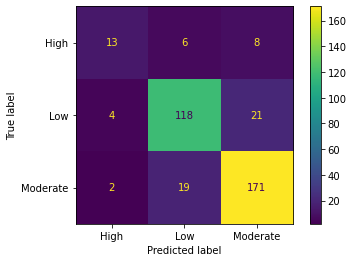

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['High','Low','Moderate'])

cm_display.plot()
plt.show() 

---

# Visualização dos Dados

- **Matriz de Correlação entre as Variáveis**

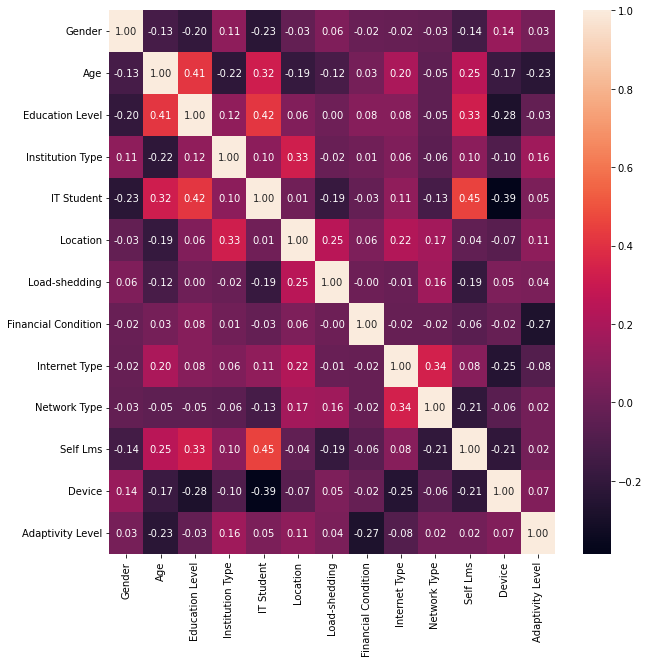

In [17]:
def matriz_de_confusão(data):
    # init figure size
    rcParams['figure.figsize'] = 10, 10
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    #fig.savefig('corr.png')

matriz_de_confusão(df_fact)

# Conclusão

O KNN é considerado um modelo simples e fácil de entender, com treinamento rápido e pouca exigência computacional, o que torna o K-Nearest Neighbors recomendado para hardwares limitados. Porém, essa simplicidade sacrifica um pouco da precisão do modelo tornando-o menos atrativo para o uso empresarial/científico.
Nos dias de hoje, o modelo KNN fica em segundo plano, já que o poder computacional não é mais um problema como era antigamente, o que dá mais espaço à modelos mais robustos (e mais precisos).

---